# Overview


Then, the class itself. We kick things off with my short (and hilarous) intro to today, then cover a few more  administrative things. 

It might seem boring to hear about admin, **but this is the stuff you need to know to do well in the class**. So I recommend watching and paying attention!

Then, we kick into gear and get started on the actual work. This week is about getting familiar with networks, and we'll focus on four main elements

* A short talk on the basic mathematical description of networks
* The `NetworkX` library 
* Matplotlib, binning, and plotting degree distributions
* Random networks

(The work-load is still a little bit light, since we want to allow those who are not super-strong at programming a bit of time to catch up. If you're bored and in need of extra work, let me know and I'll point you in the right direction.)

## The Informal Intro

Ok. In the video below I discuss

 * How it's going with COVID-19
 * Some background and context on what we'll be learning about in class today
 * Where we are with the admin stuff (how to take the class)
 * **An overview of the rest of the semester**. This last part is especially important for you to know about.

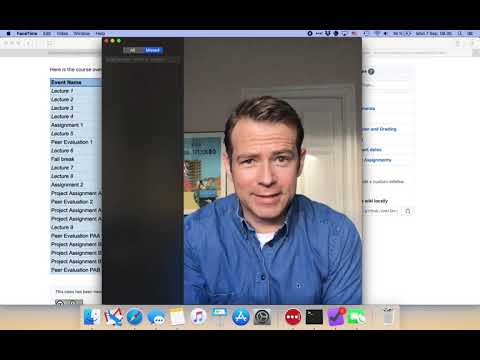

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("XkDtCQOx8Xk",width=800, height=450)

# Part 0: The Admin Stuff 
### (GitHub Page Overview Edition)

Last week, I gave you a lot of practical information about how to follow the class. 

In addition to a lot of (boring) information about COVID and my unusual precautions, I discussed the principles of how I teach. 
How each lecture is structured to maximize your learning according to state-of-the-art principles. 

This week, the admin video talks about the structure of the Course Page, which actually contains a lot of useful information. 

You'll notice that I've made it for the class that runs in the fall (Social Graphs and Interactions), but the web-page struture is similar, so everyhting should still work.

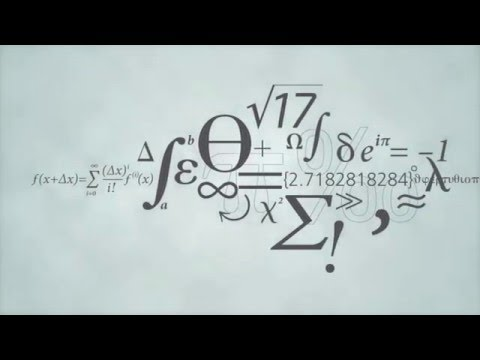

In [2]:
YouTubeVideo("42KjmxgYYNI",width=800, height=450)

Next week, I'll talk about the final elements of admin we have to cover for now

* Forming groups
* Handing in assignments
* Peer Evaluations
* The structure of the class

# Part 1: Basic mathematical description of networks

This week, let's start with some lecturing. I love networks, so I'll take some time time today to tell you about them.

> **_Video Lecture_**. Then check out a few comments on "Network Notation" (don't worry it's short). 

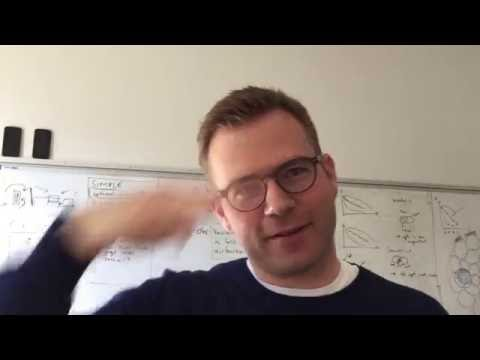

In [3]:
YouTubeVideo("MMziC5xktHs",width=800, height=450)

Now for some reading

> _Reading_. We'll be reading the textbook _Network Science_ (NS) by Laszlo Barabasi. You can read the whole 
> thing for free [**here**](http://barabasi.com/networksciencebook/). 
>
> * Read chapter 2\.
> 

And the associated exercises

> *Exercises*: Chapter 2 in *Network Science*.
> 
> * Section 2.5 states that real networks are sparse. Can you think of a real network where each node has _many_ connections? Is that network still sparse? If yes, can you explain why?
> 
> There are more questions on Chapter 2 below.
> 

**Answer**

All the networks list in table 2.1 are sparse networks, according to the definition of sparse network. For example, Email network is a sparse one. the L_max = N * (N -1) / 2 = 1635548221, which is way larger than the actural number of links (103731), so Email network is sparse.


# Part 2: Exercises using the `NetworkX` library

Let's try to solve a few of the exercises from the book using `NetworkX`

> *Exercises*:
> 
> * Go to NS Section 2.12: Homework, then
>   * Write the solution exercise **2.1** (the 'Königsberg Problem') from NS in your `notebook`. 
>   * Solve exercise **2.3** ('Graph representation') from NS using `NetworkX` in your `notebook`. (You don't have to solve the last sub-question about *cycles of length 4* ... but I'll be impressed if you do it).
>   * Solve exercise **2.5** ('Bipartite Networks') from NS using `NetworkX` in your `notebook`. *Important note*: There is a a mistake in the book. When it says "Block diagonal", they mean "Anti-diagonal" (all elements are away from the diagonal blocks). 
>     - *Note*: For those without the physical book (and therefore no exercise numbers), the part "Bipatite Networks - General Considerations" does not need to be solved (the two last questions do not make much sense to me).
> 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import networkx as nx
import collections
from networkx.algorithms.components import connected_components

**2.1**
a,c,d, b has more then two nodes that has odd number of links

**2.3**

In [3]:
a = nx.Graph()
b = nx.DiGraph()

a.add_nodes_from(list(range(1, 7)))
a.add_edges_from([(1, 2), (1, 3), (1, 4), (1, 6), (2, 3), (2, 4), (3, 6)])
b.add_nodes_from(list(range(1, 7)))
b.add_edges_from([(1, 2), (2, 3), (3, 2), (2, 4), (4, 1), (6, 1), (6, 3), (3, 1)])

In [6]:
ma = nx.adjacency_matrix(a)
print(ma.todense())
mb = nx.adjacency_matrix(b)
print(mb.todense())

[[0 1 1 1 0 1]
 [1 0 1 1 0 0]
 [1 1 0 0 0 1]
 [1 1 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]
[[0 1 0 0 0 0]
 [0 0 1 1 0 0]
 [1 1 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]


In [7]:
print(a.edges)
print(b.edges)

[(1, 2), (1, 3), (1, 4), (1, 6), (2, 3), (2, 4), (3, 6)]
[(1, 2), (2, 3), (2, 4), (3, 2), (3, 1), (4, 1), (6, 1), (6, 3)]


* Average clustering coefficient 

In [8]:
print(nx.average_clustering(a))
print(nx.average_clustering(b))

0.6388888888888888
0.32222222222222224


* If switch node 5 and node 6 in a, the row 5 and row 6 will switch in adjacency matrix of a. in the link list, the all the row start with 6 will be replaced by 5

* The degree of one node in the graph

* In a there are 4, in b there is 0

**2.5**

In [9]:
bn = nx.Graph()
bn.add_edges_from([(1, 7), (3, 7), (3, 8), (3, 9), (2, 9), (4, 9), (4, 10), (5, 9), (5, 11), (6, 11)])

mb = nx.adjacency_matrix(bn)
print(mb.todense())
# because there no link that start and end at one same node

[[0 1 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0 0]
 [0 1 0 1 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 1 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 1 0]]


In [10]:
projA = nx.Graph()
projB = nx.Graph()

projA.add_edges_from([(1, 3), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5), (5, 6)])
projB.add_edges_from([(7, 8), (7, 9), (8, 9), (9, 10), (9, 11)])

projAm = nx.adjacency_matrix(projA)
print(projAm.todense())

projBm = nx.adjacency_matrix(projB)
print(projBm.todense())

[[0 1 0 0 0 0]
 [1 0 1 1 1 0]
 [0 1 0 1 1 0]
 [0 1 1 0 1 0]
 [0 1 1 1 0 1]
 [0 0 0 0 1 0]]
[[0 1 1 0 0]
 [1 0 1 0 0]
 [1 1 0 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


* Average degree purple: 1.6666 green: 2 

In [11]:
print(nx.average_neighbor_degree(projA))
print(nx.average_neighbor_degree(projB))

{1: 4.0, 3: 2.75, 2: 3.6666666666666665, 4: 3.6666666666666665, 5: 2.75, 6: 4.0}
{7: 3.0, 8: 3.0, 9: 1.5, 10: 4.0, 11: 4.0}


> **_Video Lecture_**: Once again, it's time to stop working for a couple of minutes to hear me talk about plotting with `NetworkX`. 
> 

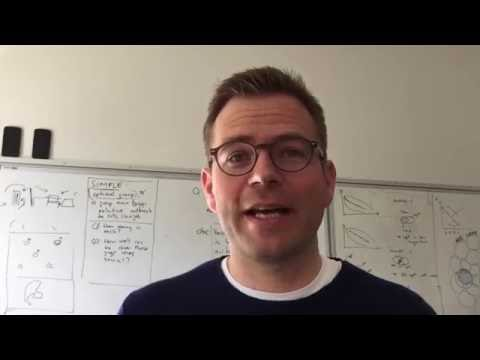

In [12]:
YouTubeVideo("iDlb9On_TDQ",width=800, height=450)

# Part 3: Plotting degree distributions

As always we'll learn about degree-distribution plotting by creating a `notebook` and trying it out. 

As a little public service announcement about this exercise: I know that you've probably tried binning data before. And that there are many functions designed to make binning easy, so there is a good chance that you think that binning data into bins is something that you don't have to worry about.

**BUT** ... with this exercise, I aim to convince you that binning isn't always trivial. And that there are key things to think about every time you need to put data into buckets. So please read the exercise carefully. And follow my instructions carefully.


> 
> *Exercises*:
> 
> Begin by importing the right packages. Start by importing `matplotlib.pyplot` (for plotting), `numpy` (for binning and other stuff), 
> `random` (for generating random numbers), and `networkx` (for generating networks.)
> 
> * Binning real numbers
>   * Let's do a gentle start and use the `random` library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.
>   * Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?
>   * Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.
> * Binning integers
>   * But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. 
> Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out 
> `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution 
> characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers. 
>   * Instead of simplify specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. 
> Create a vector $v$
> that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, 
> and the last bin contains the maximum number. 
> Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. 
> What is the sum over bin counts? Explain how the binning-vectors first and last element 
> relates to the min and max from the Poisson distribution.
>   * Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution 
> * Binning and plotting degree distributions. 
>   * Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. 
> First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$? 
> **Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average 
> degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.
>   * Now, use `networkx` to create the graph and extract the degree distribution.
>   * Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.
> 

In [13]:
mu = 2
sigma = 0.125
N = 5000
data = np.random.randn(N) * sigma + mu

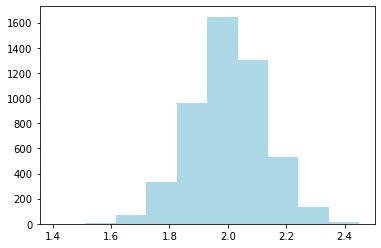

In [14]:
hx, hy, _ = plt.hist(data, bins=10, color="lightblue")

* The values of the histogram and the bin edges, they don't have the same length

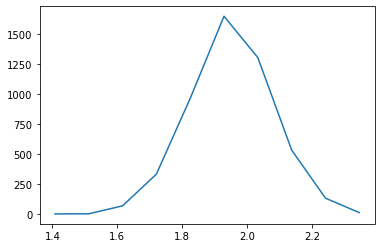

In [15]:
plt.plot(hy[:-1], hx)

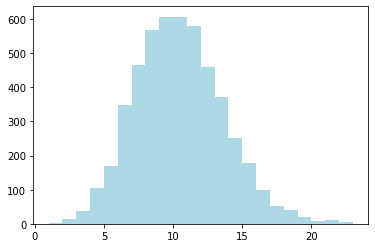

In [16]:
intData = np.random.poisson(10, N)
vec = [i for i in range(min(intData), max(intData) + 1)]
hx, hy, _ = plt.hist(intData, bins=vec, color="lightblue")

<BarContainer object of 22 artists>

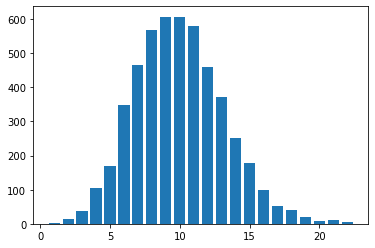

In [17]:
plt.bar(hy[:-1], hx)

Text(0.5, 0, 'Degree')

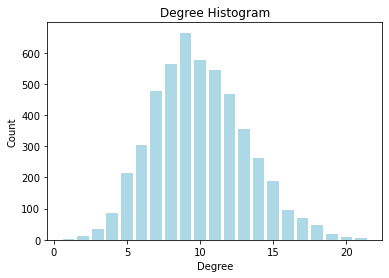

In [18]:
k = 10
p = k / (N - 1)

G = nx.generators.random_graphs.erdos_renyi_graph(N, p)

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="lightblue")

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")

# Part 4: Random networks

> **_Video Lecture_**. Now it's time to relax and watch a few minutes of info on _Random Networks_. 

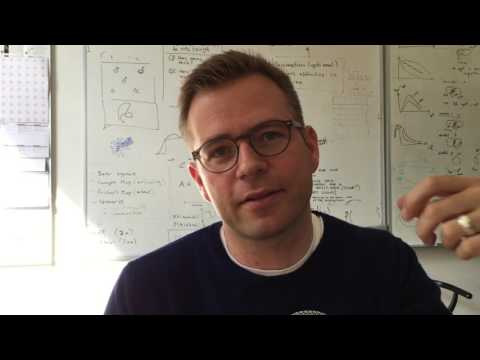

In [19]:
YouTubeVideo("c_SbQCzgqb0",width=800, height=450)

> _Reading_. Read section 3.1-3.7 (the most important part is 3.1-3.4) of Chapter 3 of _Network Science_. You can find the entire book [**here**](http://barabasi.com/networksciencebook/).


> _Exercises_ (should be completed in a `notebook`):
> 
> * Work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.
> * Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
>   * Extract the Giant Connected Component, GCC. (Hint: You can use `networkx.connected_component_subgraphs` <- it works in ealier versions of NetworkX (<2.5) || Otherwise, you can use `nx.connected_components(G)` and `G.subgraph(c).copy()`)
>   * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)
>   * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
>   * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.
> 

By the way, the default plot coming out of `networkx` doesn't look like the one below. But by tweaking parameters, you should be able to create something that looks like it.

![Sune's Network](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/edge_colormap.png)

**Answer**

**3.1**

* Expected number of links, 〈L〉 = p*N*(N-1)/2 = 4498.5
* Supercritical Regime
* p = 1 / N = 0.000333
* N = 10000
* k = p * (N - 1) = 10, d = 4
* p = 0.001

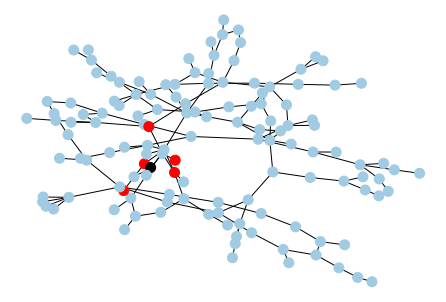

In [20]:
k = 1.5
N = 200
p = k / (N - 1)

G = nx.generators.random_graphs.erdos_renyi_graph(N, p)
largest_cc = max(nx.connected_components(G), key=len)
subG = G.subgraph(largest_cc)
picked = random.choice(list(largest_cc))
d = nx.single_source_shortest_path_length(subG, picked)
dis2 = [node for node in d.keys() if d[node] == 2]
colorParm = []
for node in list(subG.nodes()):
    if node == picked:
        colorParm.append("#000000")
    elif node in dis2:
        colorParm.append("#ff0000")
    else:
        colorParm.append("#A0CBE2")

nx.drawing.nx_pylab.draw(subG, node_size=100, node_color=colorParm)